In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize as tokenize

In [2]:
### Question 3

In [3]:
spam_set = [
"It's on, 3 months of Spotify Premium for only $0.99. Upgrade now!",
"Do it, Spotify Premium for only $0.99 for 3 months.",
"Listen today, 3 months of Spotify Premium for only $0.99.",
"Incredible, Spotify Premium for only $0.99 for 3 months.",
"Out Now, 3 months of Spotify Premium for only $0.99. Upgrade now!",
"Unbelieveable Offer, Spotify Premium for only $0.99 for 3 months.",
"Listen Up! Spotify Premium for only $0.99 for 3 months.",
"Crazy deal, Spotify Premium for only $0.99 for 3 months.",
"Brand new! Spotify Premium for only $0.99 for 3 months.",
"Outrageous Deal, Spotify Premium for only $0.99 for 3 months."
]

In [4]:
random_set = [
"Leprosy is discovered in wild CHIMPANZEES for the first time",
"The whole cast are brilliant I so miss shooting the breeze with ferg and embarrassing myself on #goggleboxirl",
"Callum Robinson became became the first Republic of Ireland player to score a hat-trick since Robbie Keane in 2014.",
"An emotional William Shatner, moments after returning from space, tells Blue Origin founder Jeff Bezos about his experience",
"Snapchat is down. Society is crumbling.",
"If Lord Frost now wants to revoke Brexit and replace it with some other deal, when do we get to vote on it?",
"It’s not Kyrie Irving’s job to keep you safe from Covid, just like it’s not your job to be the 7× NBA All-Star winner",
"The new Home Alone is filmed inside a McMansion. Everyone knows the best part of the old Home Alone is its regional charm!",
"Arrived early at Aviva Stadium to soak up atmosphere before Ireland vs Qatar match #COYBIG",
"God of War 2018 they turned Kratos into more than just some angry guy",
]

In [5]:
from nltk.tokenize import TweetTokenizer
import nltk.metrics
import distance

tknzr = TweetTokenizer()

cleaned_spam_set,cleaned_random_set = [], []
for ele in spam_set:
    cleaned_spam_set.append(' '.join(tknzr.tokenize(ele.replace(".", "").replace("!", "").replace("?","").replace(":","").replace("http", "").replace("/", ""))))

for j in random_set:
    cleaned_random_set.append(' '.join(tknzr.tokenize(j.replace(".", "").replace("!", "").replace("?","").replace(":","").replace("http", "").replace("/", ""))))


print(cleaned_spam_set)

["It's on , 3 months of Spotify Premium for only $ 099 Upgrade now", 'Do it , Spotify Premium for only $ 099 for 3 months', 'Listen today , 3 months of Spotify Premium for only $ 099', 'Incredible , Spotify Premium for only $ 099 for 3 months', 'Out Now , 3 months of Spotify Premium for only $ 099 Upgrade now', 'Unbelieveable Offer , Spotify Premium for only $ 099 for 3 months', 'Listen Up Spotify Premium for only $ 099 for 3 months', 'Crazy deal , Spotify Premium for only $ 099 for 3 months', 'Brand new Spotify Premium for only $ 099 for 3 months', 'Outrageous Deal , Spotify Premium for only $ 099 for 3 months']


In [6]:
distances = dict()
ndistances = [[0 for i in range(len(cleaned_random_set))] for j in range(len(cleaned_spam_set))] 
print(ndistances)
spam_labels = ['spam-' + str(i+1) for i in range(10)]
non_spam_labels = ['clean-' + str(i+1) for i in range(10)]
print(spam_labels)
print(non_spam_labels)

for i in range(len(cleaned_spam_set)):
    for j in range(len(cleaned_random_set)):
        #print(i, j)
        cdist = distance.levenshtein(' '.join(cleaned_spam_set[i]), ' '.join(cleaned_random_set[j]))
        ndistances[i][j] = cdist
        #distances[clabel] = distance.levenshtein(' '.join(cleaned_spam_set[i]), ' '.join(cleaned_random_set[j]))
#print(ndistances)

resultant_df = pd.DataFrame(ndistances, columns = non_spam_labels, index = spam_labels)
#resultantdfT = resultant_df.T
resultant_df

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
['spam-1', 'spam-2', 'spam-3', 'spam-4', 'spam-5', 'spam-6', 'spam-7', 'spam-8', 'spam-9', 'spam-10']
['clean-1', 'clean-2', 'clean-3', 'clean-4', 'clean-5', 'clean-6', 'clean-7', 'clean-8', 'clean-9', 'clean-10']


,clean-1,clean-2,clean-3,clean-4,clean-5,clean-6,clean-7,clean-8,clean-9,clean-10
spam-1,60,125,136,157,79,123,154,149,95,61
spam-2,54,141,153,169,55,140,174,165,106,68
spam-3,55,133,147,166,63,133,166,155,102,65
spam-4,52,135,148,164,64,136,167,160,102,66
spam-5,60,125,136,158,79,124,157,149,95,60
spam-6,59,126,136,152,79,126,158,147,93,62
spam-7,54,139,151,168,57,137,171,163,104,68
spam-8,53,136,147,164,63,135,170,160,100,65
spam-9,54,140,152,168,58,138,173,163,103,68
spam-10,55,130,141,159,73,129,162,154,99,63


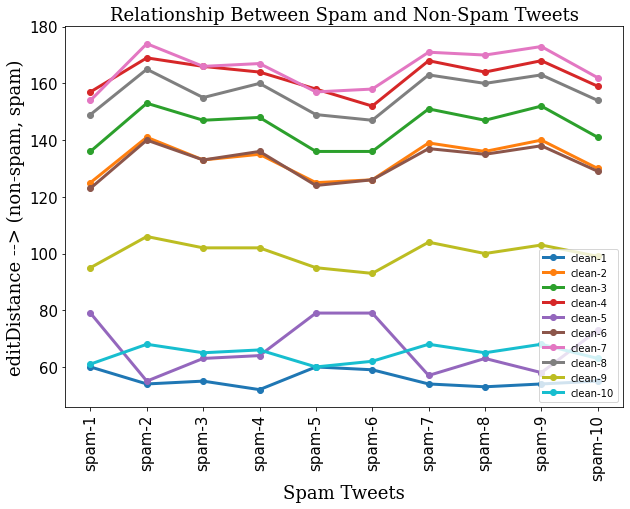

In [7]:
#import seaborn
#from matplotlib import pyplot
fig, ax1 = plt.subplots()

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 18,
        }
fig.set_size_inches(10, 7)
ax1.set_xlabel('Spam Tweets', fontdict = font)
ax1.set_ylabel('editDistance --> (non-spam, spam)', fontdict = font)
ax1.set_title('Relationship Between Spam and Non-Spam Tweets', fontdict = font)
ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.tick_params(axis='both', which='minor', labelsize=12)
plt.xticks(rotation = 90)

plt.plot(resultant_df, linewidth = 3, marker = 'o', markersize = 6)
plt.legend(non_spam_labels, loc = 'lower right')
plt.show()

In [8]:
# def calculate_entropy(frequency: list, normalized: bool = False):
#         """
#         Calculates entropy and normalized entropy of list of elements that have specific frequency
#         :param frequency: The frequency of the elements.
#         :param normalized: Calculate normalized entropy
#         :return: entropy or (entropy, normalized entropy)
#         """
#         entropy, normalized_ent, n = 0, 0, 0
#         sum_freq = sum(frequency)
#         for i, x in enumerate(frequency):
#             p_x = float(frequency[i] / sum_freq)
#             if p_x > 0:
#                 n += 1
#                 entropy += - p_x * log(p_x, 2)
#         if normalized:
#             if log(n) > 0:
#                 normalized_ent = entropy / log(n, 2)
#             return entropy, normalized_ent
#         else:
#             return entropy
# calculate_entropy(str(spam_set))



In [13]:
import math
def entropy(labels):
    freqdist = nltk.FreqDist(labels)
    probs = [freqdist.freq(l) for l in freqdist]
    return -sum(p * math.log(p,2) for p in probs)


print("The entropy value for the spam set is", entropy(tokenize(str(spam_set))))
print("The entropy value for the random set is", entropy(tokenize(str(random_set))))
print("The entropy value for both sets combined is", entropy(tokenize(str(spam_set)+str(random_set))))

The entropy value for the spam set is 4.430285832299606
The entropy value for the random set is 6.822317324538065
The entropy value for both sets combined is 6.526224584802087


In [ ]:
pd_series = pd.Series(spam_set)
counts = pd_series.value_counts()
entropy = entropy(counts)
print(entropy)

In [ ]:
import numpy as np
from scipy.stats import entropy
from math import log, e
import pandas as pd

import timeit

def entropy1(labels, base=None):
  value,counts = np.unique(labels, return_counts=True)
  return entropy(counts, base=base)

def entropy2(labels, base=None):
  """ Computes entropy of label distribution. """

  n_labels = len(labels)

  if n_labels <= 1:
    return 0

  value,counts = np.unique(labels, return_counts=True)
  probs = counts / n_labels
  n_classes = np.count_nonzero(probs)

  if n_classes <= 1:
    return 0

  ent = 0.

  # Compute entropy
  base = e if base is None else base
  for i in probs:
    ent -= i * log(i, base)

  return ent

def entropy3(labels, base=None):
  vc = pd.Series(labels).value_counts(normalize=True, sort=False)
  base = e if base is None else base
  return -(vc * np.log(vc)/np.log(base)).sum()

def entropy4(labels, base=None):
  value,counts = np.unique(labels, return_counts=True)
  norm_counts = counts / counts.sum()
  base = e if base is None else base
  return -(norm_counts * np.log(norm_counts)/np.log(base)).sum()


print(entropy1(random_set))
print(entropy2(random_set))
print(entropy3(random_set))
print(entropy4(random_set))